# Trabajo semanal 8

### Parte I - Ejercicio de MAI

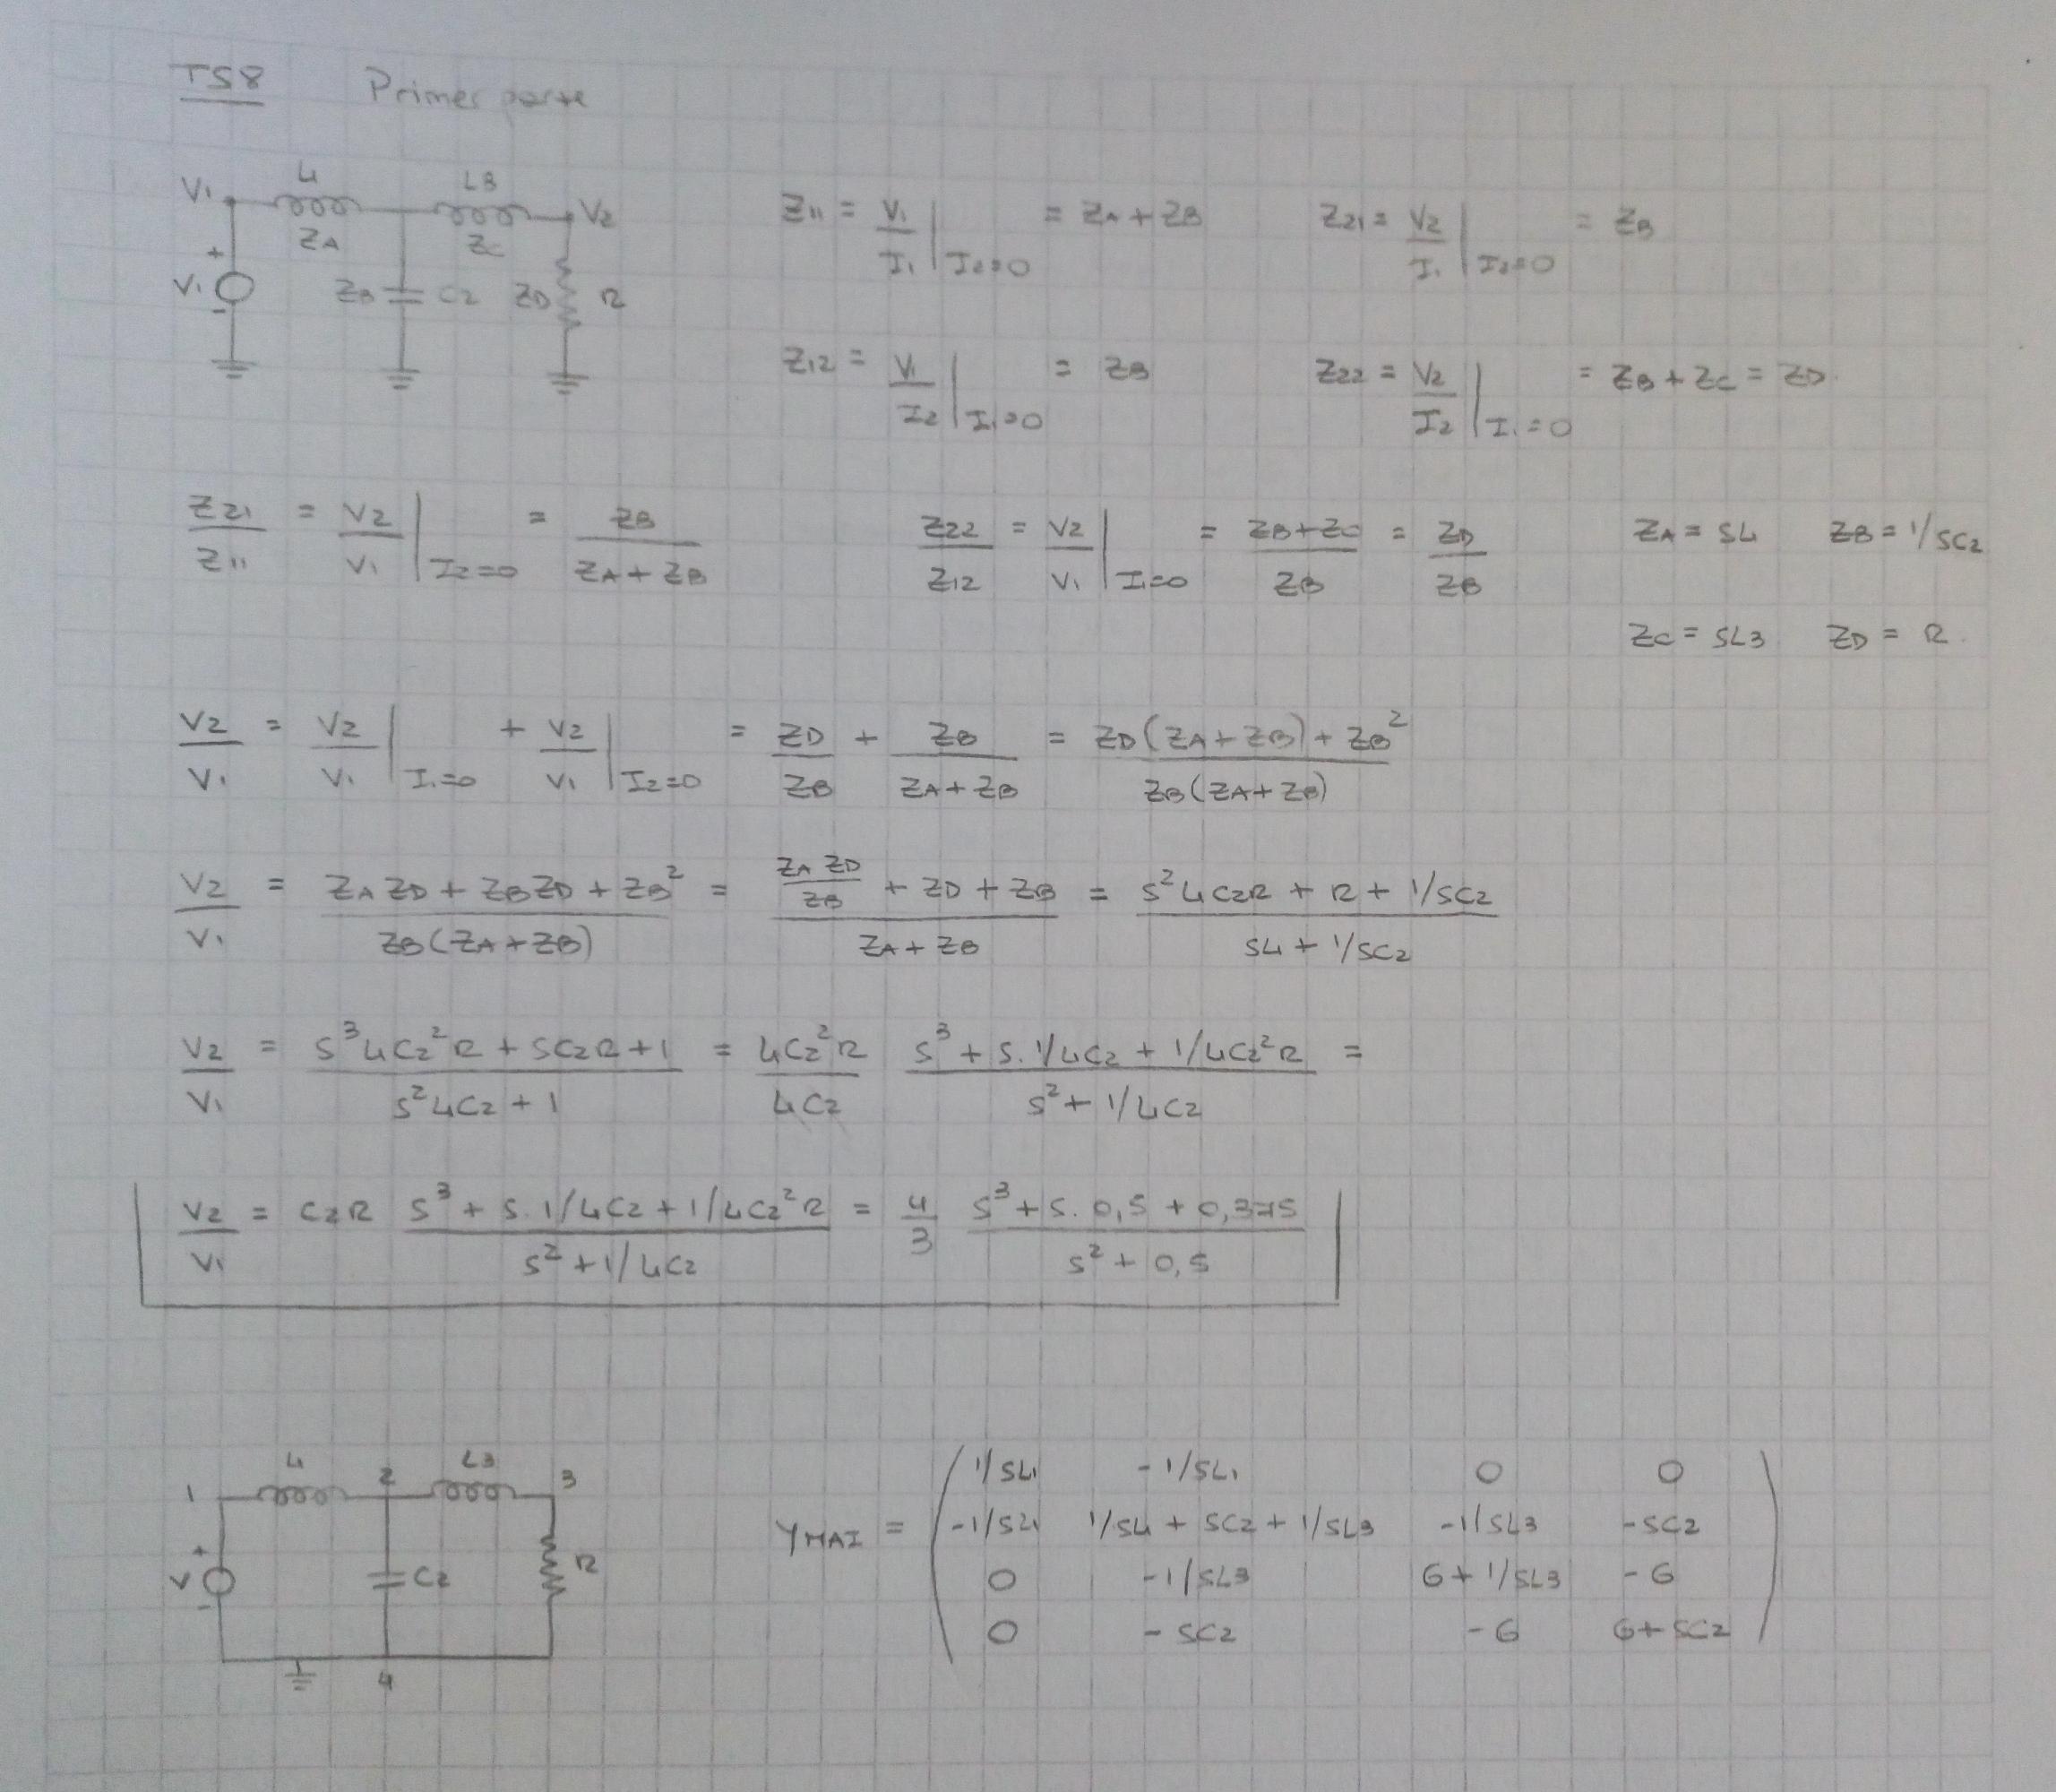

#### Simulación circuital

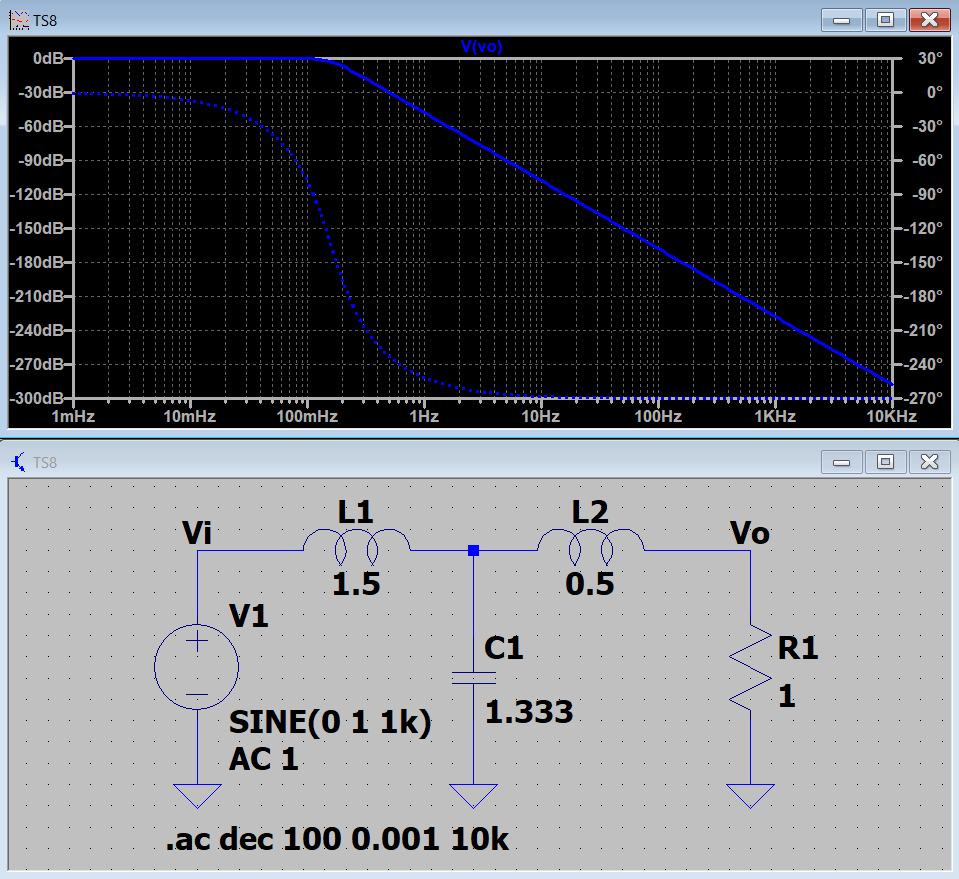

### Parte II - Filtros digitales

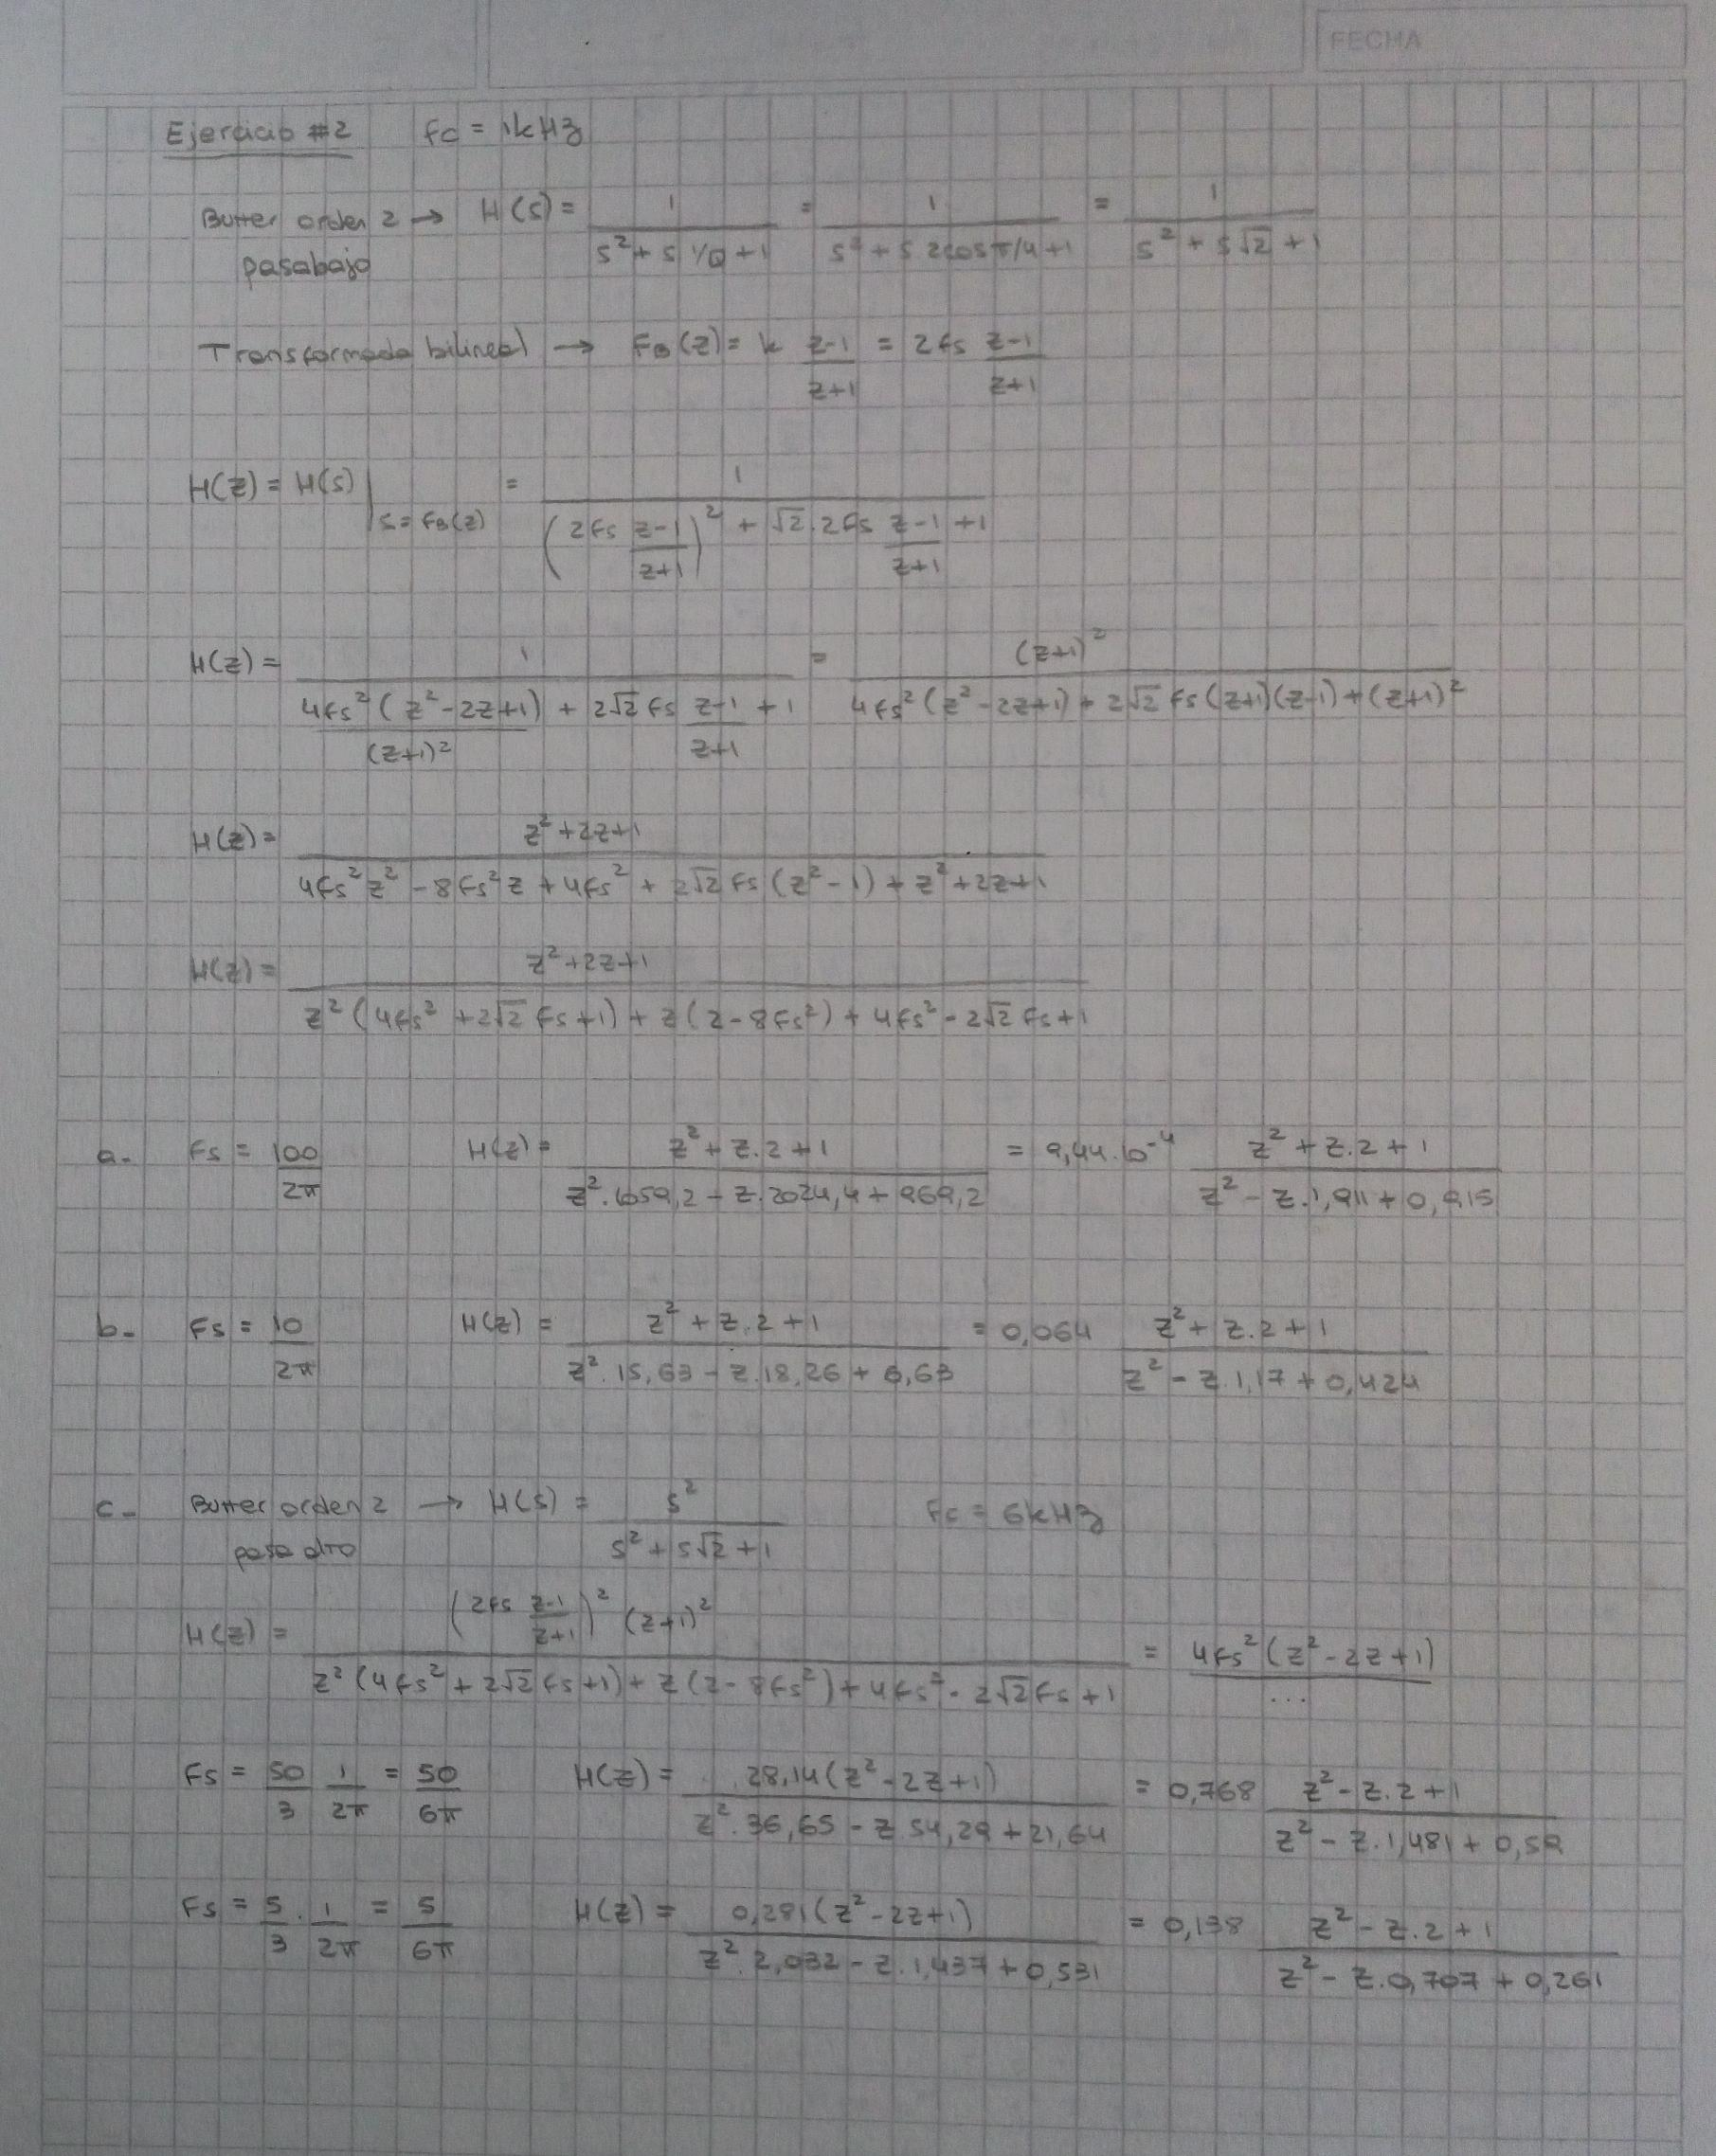

#### Gráficos

C:\Users\camic\anaconda3\lib\site-packages\scipy\signal\_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


(0.0, 50.0)

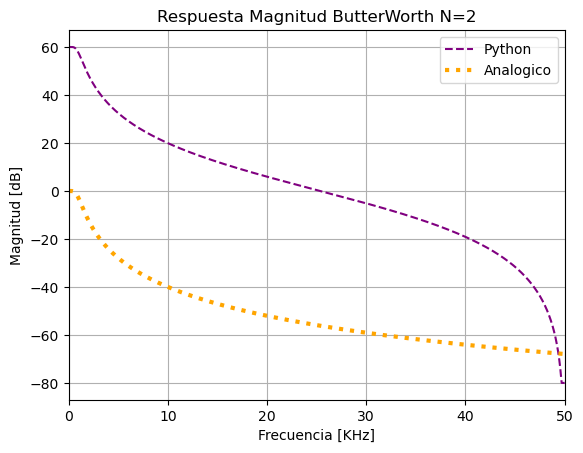

In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

WN = int(5*10e3) # Cantidad de puntos para la funcion Freqz
kHz = 1000
# Frecuencia de corte del filtro
fc = 1e3
W_fc = 2*np.pi*fc
# Frecuencia de Sampling
fs = 100e3
nq = fs/2
ws = 2*np.pi*fs

# Normalizacion de las Fs
fs_n = fs/W_fc
ws_n = ws/W_fc

# K de transormada Bilineal
K = 2*fs_n
# Q de Butter Orden 2
Q = np.sqrt(2)/2

num_lp = [0,  0,  1]
den_lp = [1, 1/Q, 1]

numz = [1, 2, 1] 
denz = [1, -1.911, 0.915] #A
#denz = [1, -1.17, 0.424] #B

w, h = sig.freqz(numz,denz,WN)

# filtro analogico
sys = sig.TransferFunction(num_lp, den_lp)
f = np.logspace(-2, 2,50000)
w_analog, mag_analog, phase_analog = sig.bode(sys,f)

h_db_py = 20*np.log10(np.maximum(np.abs(h), 1e-4))

# Grafico
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
# MODULO
ax.plot(w*nq/(np.pi*kHz), h_db_py,color='purple',linestyle='dashed', label = 'Python')
ax.plot(w_analog, mag_analog, color = 'orange',linestyle=':',  linewidth=3, label = 'Analogico')
ax.grid(True)
ax.set_title('Respuesta Magnitud ButterWorth N=2')
ax.set_ylabel('Magnitud [dB]')
ax.set_xlabel('Frecuencia [KHz]')
ax.legend()
ax.set_xlim([0, 50])

(0.0, 50.0)

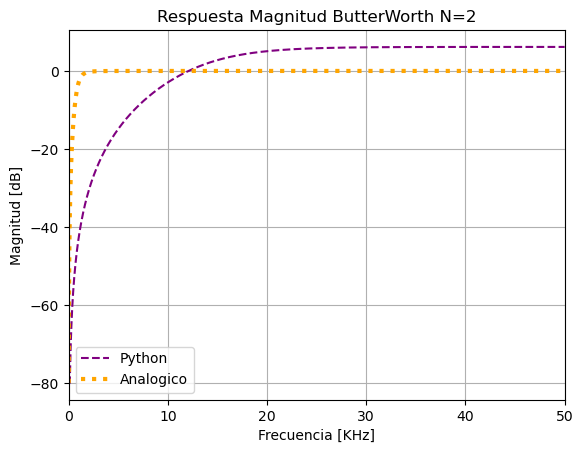

In [4]:
# Frecuencia de corte del filtro
fc = 6e3
W_fc = 2*np.pi*fc
# Frecuencia de Sampling
fs = 100e3
nq = fs/2
ws = 2*np.pi*fs

# Normalizacion de las Fs
fs_n = fs/W_fc
ws_n = ws/W_fc

# K de transormada Bilineal
K = 2*fs_n
# Q de Butter Orden 2
Q = np.sqrt(2)/2

num_hp = [1,  0,  0]
den_hp = [1, 1/Q, 1]

numz = [1, -2, 1]
denz = [1, -1.481, 0.59] #C_A
#denz = [1, -0.707, 0.261] #C_B

w, h = sig.freqz(numz,denz,WN)

# filtro analogico
sys = sig.TransferFunction(num_hp, den_hp)
f = np.logspace(-2, 2,50000)
w_analog, mag_analog, phase_analog = sig.bode(sys,f)

h_db_py = 20*np.log10(np.maximum(np.abs(h), 1e-4))

# Grafico
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
# MODULO
ax.plot(w*nq/(np.pi*kHz), h_db_py,color='purple',linestyle='dashed', label = 'Python')
ax.plot(w_analog, mag_analog, color = 'orange',linestyle=':',  linewidth=3, label = 'Analogico')
ax.grid(True)
ax.set_title('Respuesta Magnitud ButterWorth N=2')
ax.set_ylabel('Magnitud [dB]')
ax.set_xlabel('Frecuencia [KHz]')
ax.legend()
ax.set_xlim([0, 50])

Justificaría utilizar prewarping en el inciso B, ya que es donde se puede ver mayor diferencia entre las curvas

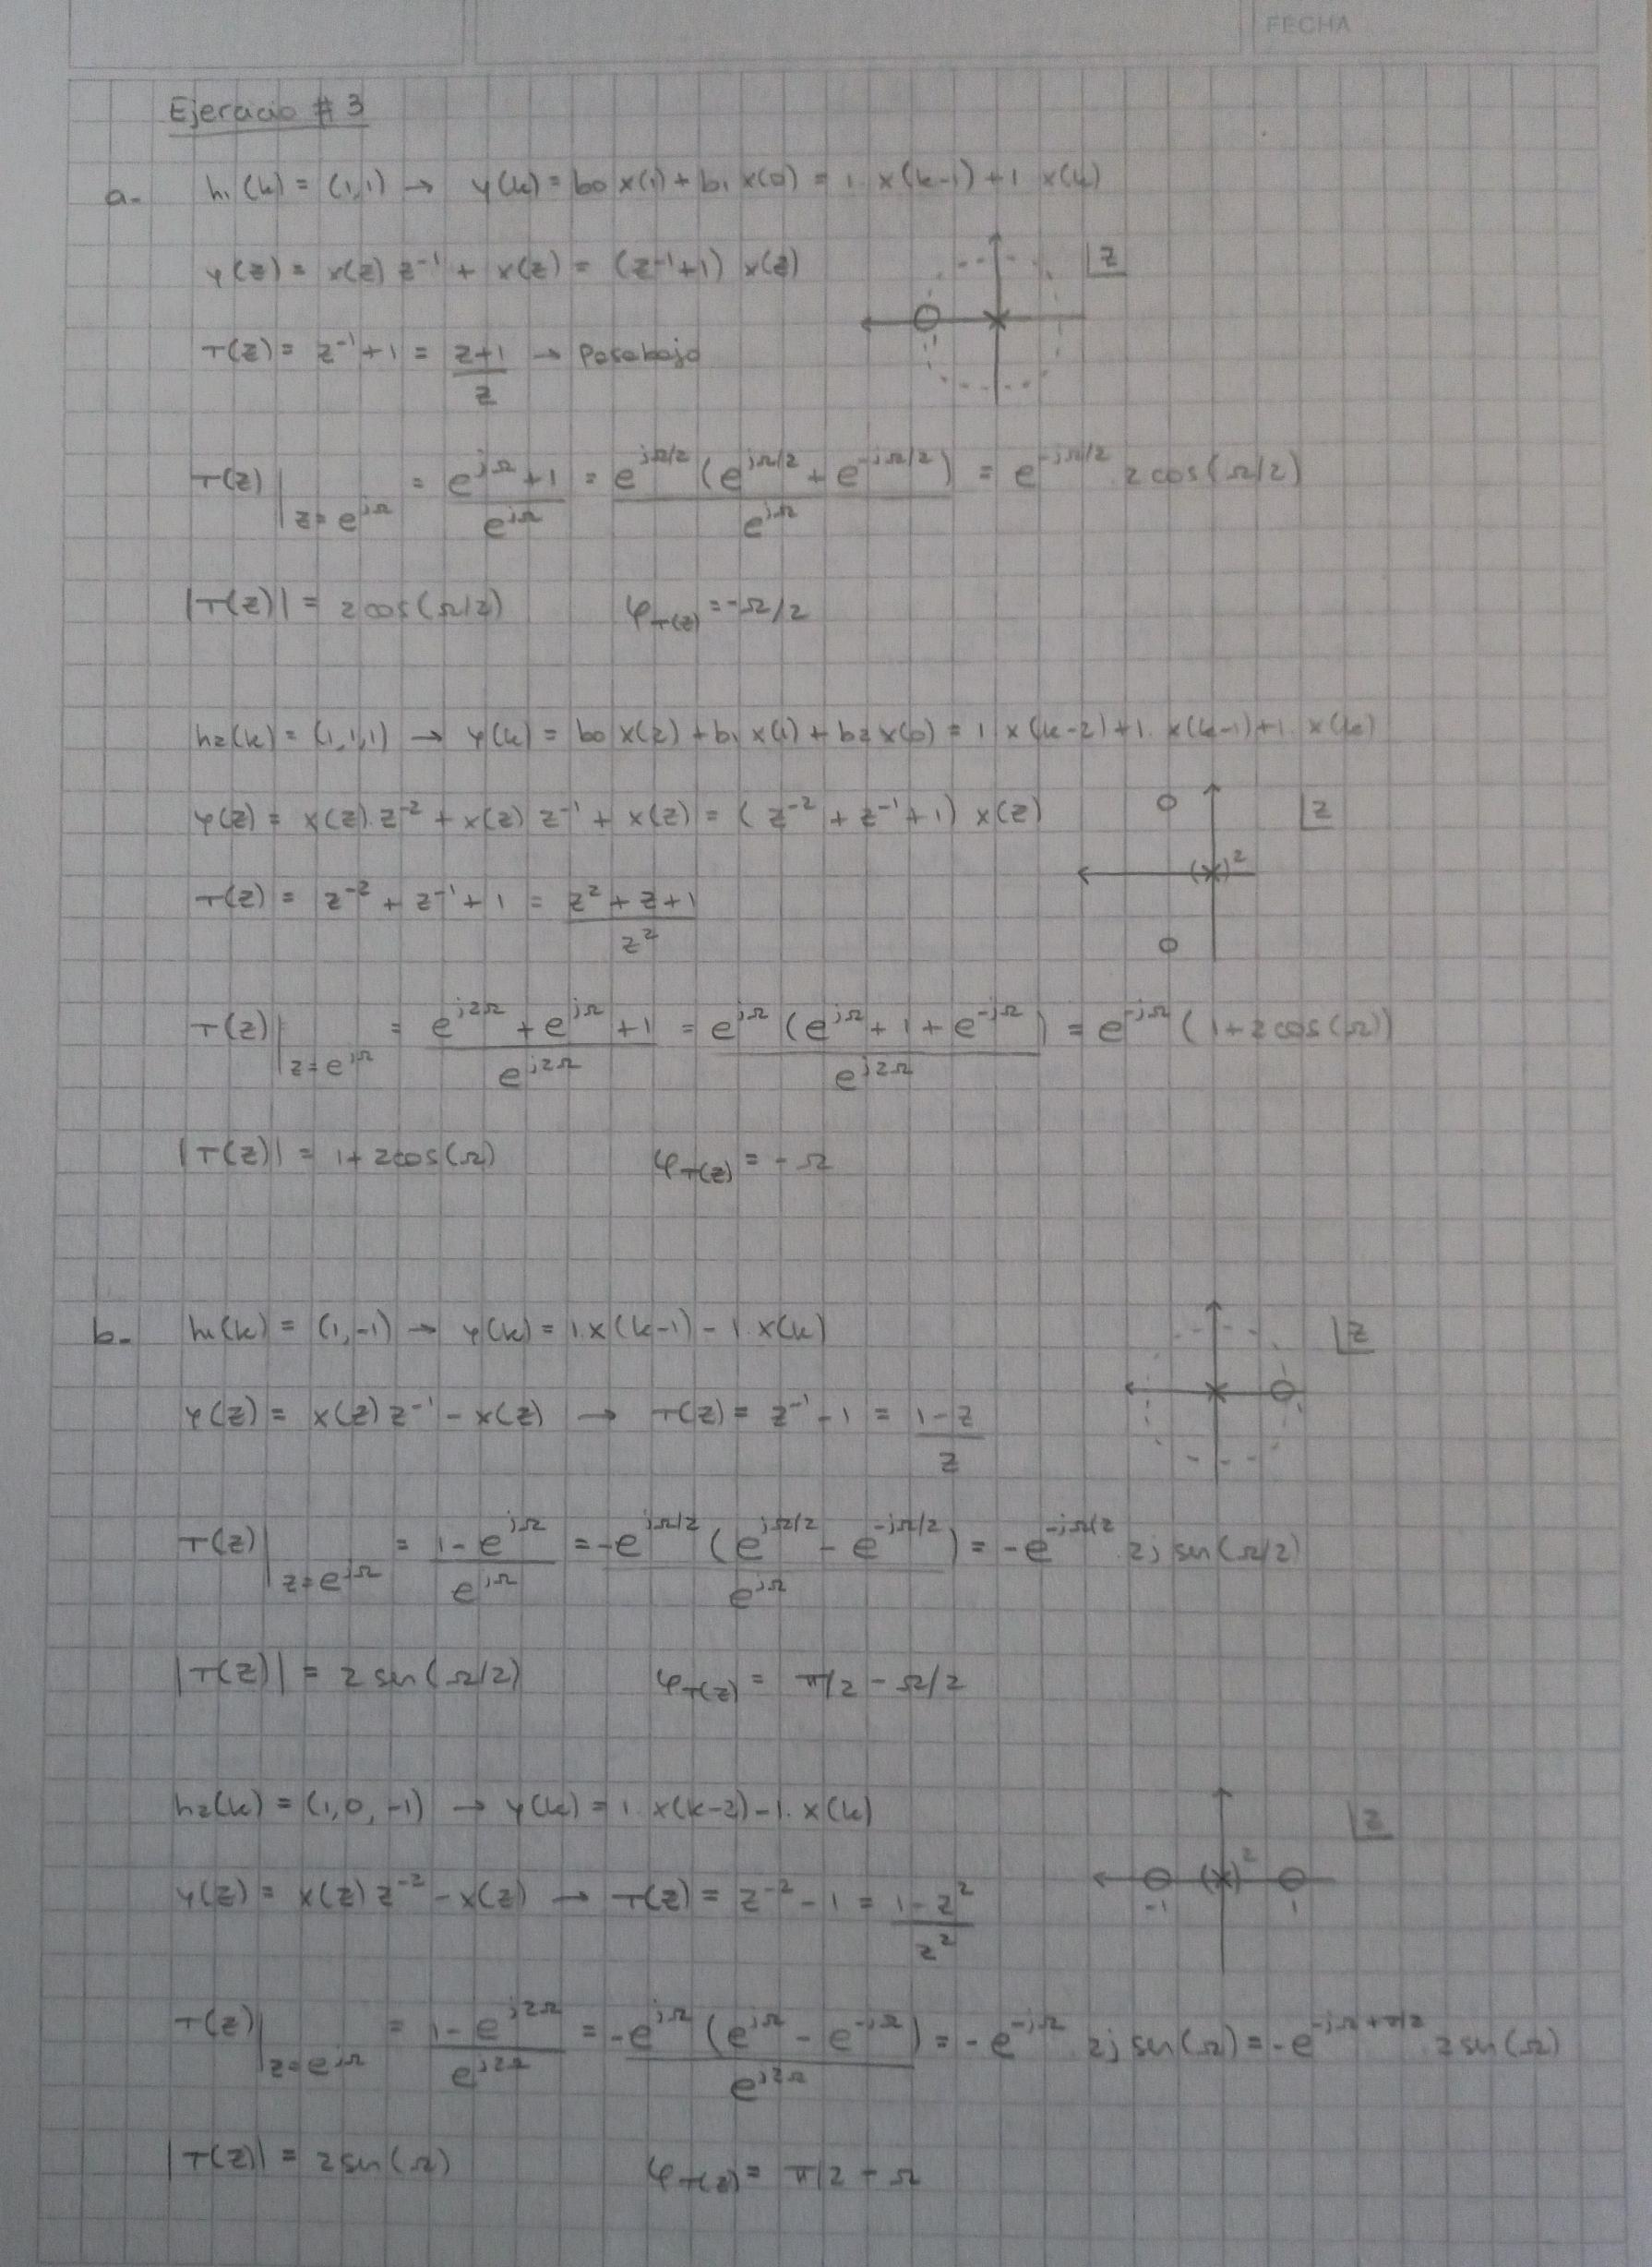